# Americans' View of Cybersecurity

American consumers don't trust the organizations--government or companies--to keep information about them safe, and they also think that data collection is inevitable. However, there is some contradiction. Not only do Americans not trust government and companies to protect their data online from thieves, but they don't do a very good job with protecting their data, either.

1. Most Americans have been affected by a data breach, and the type of incidents they have been affected by.

2. Perception of what they trust, or don't trust.

3. Common security measures they should be using/not using (passwords, device lock, etc)

4. Do consumers punish companies after a breach (measured by stock price). Could be small multiples?

I looked at how Americans handle their own data protection by analyzing the dataset that was published by Pew Research on how well people know about online security and whether or not they actually do those things. The analysis compares different groups and what their security habits were.

In [92]:
#import statements
import pandas as pd
import re
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
#open survey data files
march = pd.read_csv("data/personalsecurity.csv")

In [94]:
#march.head()
march.columns.values

array(['psraid', 'sample', 'int_date', 'lang', 'version', 'form',
       'llitext1', 'q1', 'eminuse', 'intmob', 'intfreq', 'device1a',
       'smart1', 'snsint2', 'acct1a', 'acct1b', 'acct1c', 'acct1d',
       'acct2', 'acct3a', 'acct3b', 'acct3c', 'acct3d', 'acct3e',
       'acct3f', 'acct3g', 'secur1', 'secur2a', 'secur2b', 'secur2c',
       'secur2d', 'secur2e', 'secur2f', 'secur2g', 'habits1a', 'habits1b',
       'habits1c', 'habits1d', 'habits1e', 'habits1f', 'habits2',
       'habits3', 'habits4a', 'habits4b', 'habits4c', 'habits5',
       'habits6', 'habits7', 'habits8', 'habits9', 'habits10', 'habits11',
       'habits12', 'wifi1', 'wifi2a', 'wifi2b', 'wifi2c', 'wifi2d',
       'policy1', 'policy2a', 'policy2b', 'policy3', 'policy4', 'policy5',
       'policy6a', 'policy6b', 'policy6c', 'policy6d', 'policy6e', 'sex',
       'age', 'educ2', 'hisp', 'race3m1', 'race3m2', 'race3m3', 'race3m4',
       'birth_hisp', 'marital', 'par', 'emplnw3', 'party', 'partyln',
       'ideo', 'in

In [95]:
# file:///home/fyr/Downloads/Americans-and-Cybersecurity-topline.pdf

# Have you ever...[been hacked]?
march = march.rename(columns={"secur2a": "ssn", 
                   "secur2b": "pii",
                   'secur2c': "fraud",
                   'secur2d':"email", 
                   'secur2e':"socmedia", 
                   'secur2f':"idtheft", 
                   'secur2g':"tax"
                  })

#just hacks
compromised = march[['ssn', 'pii', 'fraud', 'email', 'socmedia','idtheft','tax']]

# 2 is no 1 is yes 8 is don't know 9 is refused to answer

file:///home/fyr/Downloads/Americans-and-Cybersecurity-topline.pdf

In [98]:
compromised.dtypes

ssn          int64
pii          int64
fraud        int64
email       object
socmedia    object
idtheft      int64
tax          int64
dtype: object

In [97]:
#compromised.ssn.unique()
#compromised.pii.unique()
#compromised.fraud.unique()
#compromised.email.unique()
compromised.socmedia.unique()
#compromised.idtheft.unique()
#compromised.tax.unique()

array([' ', '2', '1', '8', '9'], dtype=object)

In [99]:
#compromised.email.value_counts()
compromised.socmedia.value_counts()

2    539
     375
1    123
8      2
9      1
Name: socmedia, dtype: int64

In [100]:
#clean up data
compromised = compromised.replace(r'^\s*$', '9', regex=True)
compromised['email']=compromised.email.astype('int')
compromised['socmedia']=compromised.socmedia.astype('int')
compromised

,ssn,pii,fraud,email,socmedia,idtheft,tax
0,2,1,1,1,9,2,2
1,1,2,2,2,2,2,2
2,1,2,2,2,2,2,2
3,2,2,2,2,2,2,2
4,2,2,1,1,9,2,2
...,...,...,...,...,...,...,...
1035,1,1,2,2,2,1,2
1036,2,2,2,2,2,2,2
1037,2,1,1,2,2,2,2
1038,2,2,1,9,9,2,2


In [107]:
#recode to 0=no and 1=yes instead of 1=yes and 2=no
compromised.loc[compromised['ssn'] ==2, 'ssn'] = 0
compromised.loc[compromised['pii'] ==2, 'pii'] = 0
compromised.loc[compromised['fraud'] ==2, 'fraud'] = 0
compromised.loc[compromised['email'] ==2, 'email'] = 0
compromised.loc[compromised['socmedia'] ==2, 'socmedia'] = 0
compromised.loc[compromised['idtheft'] ==2, 'idtheft'] = 0
compromised.loc[compromised['tax'] ==2, 'tax'] = 0

compromised.ssn.unique()

array([0, 1, 8])

In [124]:
compromise = compromised.apply(pd.Series.value_counts)
compromise = compromise.transpose()
compromise = compromise[[0,1]]
compromise = compromise.rename(columns={0: "no", 1: "yes"})
compromise

,no,yes
ssn,867.0,167.0
pii,628.0,402.0
fraud,561.0,475.0
email,741.0,175.0
socmedia,539.0,123.0
idtheft,871.0,153.0
tax,970.0,57.0


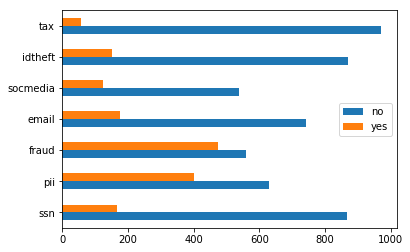

In [126]:
compromise.plot.barh()

#####
# need to do the rest of this file

In [141]:
#habits

#'habits2','habits3' #'habits4a', 'habits4b', 'habits4c', 
#'habits5','habits6', 'habits7', 'habits8', 'habits9', 'habits10', 'habits11', 'habits12'

march = march.rename(columns={"habits1a": "memorize", 
                   "habits1b": "paper",
                   'habits1c': "manager",
                   'habits1d':"doc", 
                   'habits1e':"browser", 
                   'habits1f':"other", 
                              'habits2':'methods'
                  })
habits = march[['memorize','paper','manager','doc','browser','other']]
habits

,memorize,paper,manager,doc,browser,other
0,1,1,2,2,2,2
1,2,1,2,2,2,2
2,1,2,2,2,2,2
3,1,1,2,2,2,2
4,1,2,2,2,2,2
...,...,...,...,...,...,...
1035,2,1,2,2,2,2
1036,1,1,2,2,1,2
1037,2,1,2,2,2,2
1038,,,,,,


In [135]:
habits.dtypes

memorize    object
paper       object
manager     object
doc         object
browser     object
other       object
dtype: object

In [136]:
#clean up data
habits = habits.replace(r'^\s*$', '9', regex=True)
habits['memorize']=habits.memorize.astype('int')
habits['paper']=habits.paper.astype('int')
habits['manager']=habits.manager.astype('int')
habits['doc']=habits.doc.astype('int')
habits['browser']=habits.browser.astype('int')
habits['other']=habits.other.astype('int')
habits

,memorize,paper,manager,doc,browser,other
0,1,1,2,2,2,2
1,2,1,2,2,2,2
2,1,2,2,2,2,2
3,1,1,2,2,2,2
4,1,2,2,2,2,2
...,...,...,...,...,...,...
1035,2,1,2,2,2,2
1036,1,1,2,2,1,2
1037,2,1,2,2,2,2
1038,9,9,9,9,9,9


In [138]:
#recode to 0=no and 1=yes instead of 1=yes and 2=no
habits.loc[habits['memorize'] ==2, 'memorize'] = 0
habits.loc[habits['paper'] ==2, 'paper'] = 0
habits.loc[habits['manager'] ==2, 'manager'] = 0
habits.loc[habits['doc'] ==2, 'doc'] = 0
habits.loc[habits['browser'] ==2, 'browser'] = 0
habits.loc[habits['other'] ==2, 'other'] = 0

habits.memorize.unique()

array([1, 0, 9, 8])

In [139]:
habits = habits.apply(pd.Series.value_counts)
habits = habits.transpose()
habits = habits[[0,1]]
habits = habits.rename(columns={0: "no", 1: "yes"})
habits

,no,yes
memorize,148,776
paper,442,481
manager,806,112
doc,707,215
browser,758,163
other,876,30


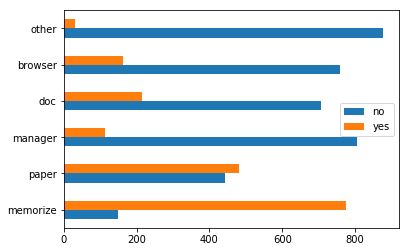

In [140]:
habits.plot.barh()

In [165]:
methods = march.methods.value_counts()
methods=pd.DataFrame(methods)
methods = methods.rename(index={'1': "memorize", '2': "paper", '4': "doc", '3': "manager", '5': "browser", '8': "unknown", '6': "other", '9': "none"})


Index([' ', 'memorize', 'paper', 'doc', 'manager', 'browser', 'unknown',
       'other', 'none'],
      dtype='object')

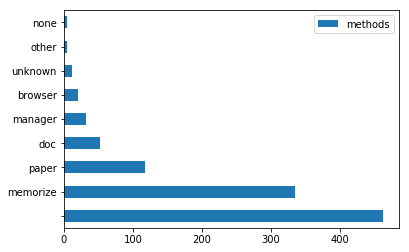

In [162]:
methods.plot.barh()

In [ ]:
pd.DataFrame

In [ ]:
#scores by gender
plt.style.use('seaborn-deep')
bins = np.linspace(0,100)
plt.hist([men.to_numpy(), women.to_numpy()], bins, label=['men', 'women'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
#different way to chart
sns.distplot(women['score'], kde=False, bins=13,  label='women')
sns.distplot(men['score'],  kde=False, bins=13, label='men')
plt.legend(prop={'size': 12})
plt.title('Scores by Gender')
plt.xlabel('Quiz Scores')
plt.xlim(0,100)
plt.ylabel('Frequency')

In [ ]:
#income
#1) Less than $5,000	39	2.6
#2) $5,000 to $7,499	21	1.4
#3) $7,500 to $9,999	17	1.1
#4) $10,000 to $12,499	47	3.1
#5) $12,500 to $14,999	39	2.6
#6) $15,000 to $19,999	62	4.1
#7) $20,000 to $24,999	71	4.7
#8) $25,000 to $29,999	64	4.2
#9) $30,000 to $34,999	83	5.5
#10) $35,000 to $39,999	86	5.7
#11) $40,000 to $49,999	118	7.8
#12) $50,000 to $59,999	152	10
#13) $60,000 to $74,999	137	9
#14) $75,000 to $84,999	112	7.4
#15) $85,000 to $99,999	114	7.5
#16) $100,000 to $124,999	163	10.7
#17) $125,000 to $149,999	88	5.8
#18) $150,000 to $174,999	47	3.1
#19) $175,000 or more	60	3.9

bins = np.linspace(0,20)
quiz.hist(column='income',bins=19)

# median income is 13, the biggest number is for 16
quiz.income.value_counts()
#quiz.income.median()

In [ ]:
# lower income, lower test scores
quiz.groupby('income').score.mean()

In [ ]:
bins = np.linspace(0,4)
quiz.hist(column='education',bins=4)

#most at 4,median is 3
quiz.education.value_counts()
#quiz.education.median()

In [ ]:
#lower education lower quiz
quiz.groupby('education').score.median()

In [ ]:
#predominantly white
bins = np.linspace(0,20)
quiz.hist(column='ethnicity',bins=5)

#most at 1,median is 1
quiz.ethnicity.value_counts()
#quiz.ethnicity.median()

In [ ]:
#group total score by race
white = pd.DataFrame(quiz.loc[quiz.ethnicity==1, 'score'])
poc = pd.DataFrame(quiz.loc[quiz.gender>1, 'score'])# women tended to score worse on the test
g_w = white.score.value_counts().rename_axis('unique_values').to_frame('white')
g_p = poc.score.value_counts().rename_axis('unique_values').to_frame('poc')
race =  pd.concat([g_w, g_p], axis=1)
race

In [ ]:
#similar distribution but lower frequency, so whites aren't necessarily better
sns.distplot(white['score'], kde=False, bins=13,  label='white')
sns.distplot(poc['score'],  kde=False, bins=13, label='poc')
plt.legend(prop={'size': 12})
plt.title('Scores by Ethnicity')
plt.xlabel('Quiz Scores')
plt.xlim(0,100)
plt.ylabel('Frequency')

In [ ]:
march.head()